# Image Preprocessing Framework - Live Demonstration<br>
![System Test Engineering Logo](related/logo_fhj_stm.jpg)<br>
---

**Master's Degree Project in System Test Engineering**  
**FH JOANNEUM - University of Applied Sciences**

---

**Author:** Luis Kraker  
**Supervisor:** DDr. Gudrun Schappacher-Tilp  
**Date:** 31<sup>th</sup> January, 2024    

---

**Note:** This notebook was created in january 2024 and may not be up-to-date with the latest changes in the repository. Please be aware that some parts might not work as expected with the current version of the project.

---

## Preparation

In [72]:
# Imports
import importlib
import os

import source.load_raw_data.kaggle_dataset as kaggle_dataset
from source.utils.pcb_visualization import PCBVisualizerforTF
from source.image_preprocessing.image_preprocessor import ImagePreprocessor
import source.image_preprocessing.preprocessing_steps as steps


In [73]:
# Load Dataset
image_dataset = kaggle_dataset.load_tf_record()

## Main Usage - Demonstration

In [74]:
# Initialize the Image Preprocessor
preprocessor = ImagePreprocessor()

# Define the Preprocessing Pipeline
pipeline = [
    steps.AdaptiveHistogramEqualizer( clip_limit =4.0 , tile_gridsize =[4 ,4]),
    steps.ShapeResizer(desired_shape =[1500, 1500] , resize_method ='bilinear'),
    steps.RGBToGrayscale(),
]

# Set and Process the Dataset
preprocessor.set_pipe(pipeline)
processed_dataset = preprocessor.process(image_dataset)

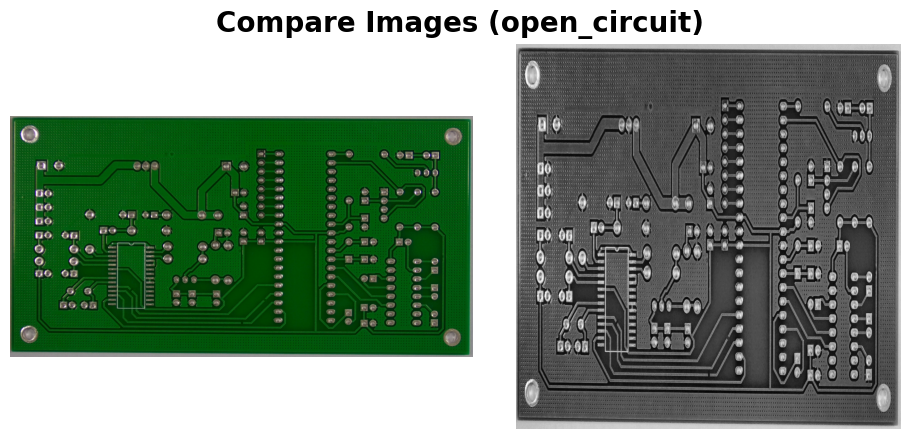

In [75]:
pcb_visualizer = PCBVisualizerforTF()
pcb_visualizer.plot_image_comparison(image_dataset, processed_dataset, 1)

## Serialization & Randomization - Demonstration
[JSON File](test.json)

In [84]:
json_path = os.path.join(os.path.curdir, 'test.json')
preprocessor.load_randomized_pipe_from_json(json_path)
print(preprocessor.get_pipe_code_representation())

[
    AdaptiveHistogramEqualizer(clip_limit=3.0, tile_gridsize=(3, 3)),
    ShapeResizer(desired_shape=(2000, 2000), resize_method='nearest'),
    MeanNormalizer()
]



---

<a id='appendix'></a>
## Appendix: Preprocessing Step Sequence Randomization  

![Probabilistic Preprocessing Pipeline Configuration](related/pipeline_sequence_randomisation_image.png)<br>

JSON Entry for Probabilistic Preprocessing Pipeline Configuration:

    {
        "Adaptive Histogram Equalizer__I0F75": {
            "clip_limit": [1.0, 2.0, 2.0, 3.0, 4.0],
            "tile_gridsize": [[4,4], [6,6], [8,8], [10,10]]
        },
        "Global Histogram Equalizer__I0F25": {},
        "Gaussian Blur Filter__I1F33": {
            "kernel_size": [[5, 5],[8,8]],
            "sigma": [0.3, 0.5, 0.7, 0.9]
        },
        "Median Blur Filter__I1F33": {
            "kernel_size": [5, 7, 9]
        },
        "Bilateral Filter__I1F34": {
            "diameter": [9, 11, 13],
            "sigma_color": [75, 100, 
            
            125],
            "sigma_space": [75, 100, 125]
        },
        "Standard Normalizer__I2F50": {},
        "Mean Normalizer__I2F50": {}
    }

[JSON File](test.json)

In [96]:
preprocessor.load_randomized_pipe_from_json(json_path)
print(preprocessor.get_pipe_code_representation())

[
    AdaptiveHistogramEqualizer(clip_limit=4.0, tile_gridsize=(10, 10)),
    BilateralFilter(diameter=9, sigma_color=100.0, sigma_space=100.0),
    MeanNormalizer()
]
